In [11]:

from engine import Value
from nn import MLP
import random
import numpy as np
from graphviz import Digraph


In [12]:
def trace(root):
    # builds sets of nodes and edges in the graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for c in v._children:
                edges.add((c,v))
                build(c)
    build(root)
    return nodes, edges
    
def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'}) # left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        # print(n)
        # print(n.label)
        val_node_label = '' if not len(n.label) else f'{n.label}, '    
        val_node_label += f'v:{n.data:.2f}, ∂(L)/∂(v):{n.grad:.2f}'
        print(val_node_label)
        dot.node(name=uid,label=val_node_label,shape='record')
        if n._op:
            # if the node is a result of some operation, create entering op node to it
            dot.node(name=uid+n._op, label=n._op) # create op node
            dot.edge(uid+n._op, uid) # edge from op symbol to op result
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op) # edge from previous value to next op symbol

    return dot


v:-15.00, ∂(L)/∂(v):0.00
v:5.00, ∂(L)/∂(v):0.00
v:-1.00, ∂(L)/∂(v):0.00
y, v:15.00, ∂(L)/∂(v):0.00
L, v:1.00, ∂(L)/∂(v):0.00
a, v:3.00, ∂(L)/∂(v):0.00
diff, v:-1.00, ∂(L)/∂(v):0.00
y^, v:14.00, ∂(L)/∂(v):0.00
b, v:9.00, ∂(L)/∂(v):0.00


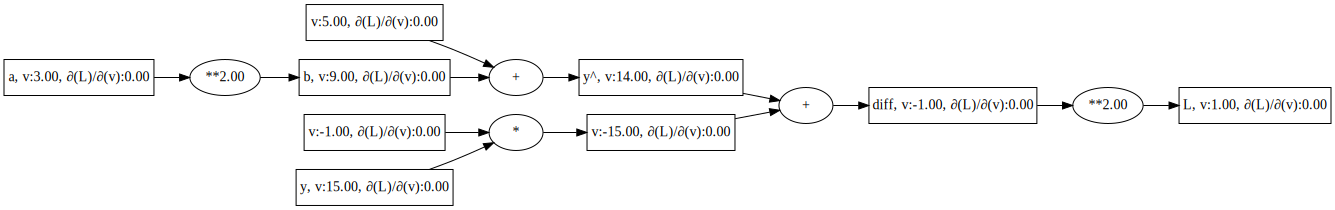

In [13]:
# Simple example
a = Value(3.0); a.label='a'
b = a**2; b.label = 'b'
y_pred = b + 5; y_pred.label='y^'
y_true = Value(15.0); y_true.label='y'
diff =  y_pred - y_true ; diff.label='diff'
L = diff**2; L.label='L'
v,e = trace(L)

draw_dot(L) 

v:-15.00, ∂(L)/∂(v):-2.00
v:5.00, ∂(L)/∂(v):-2.00
v:-1.00, ∂(L)/∂(v):-30.00
y, v:15.00, ∂(L)/∂(v):2.00
L, v:1.00, ∂(L)/∂(v):1.00
a, v:3.00, ∂(L)/∂(v):-12.00
diff, v:-1.00, ∂(L)/∂(v):-2.00
y^, v:14.00, ∂(L)/∂(v):-2.00
b, v:9.00, ∂(L)/∂(v):-2.00


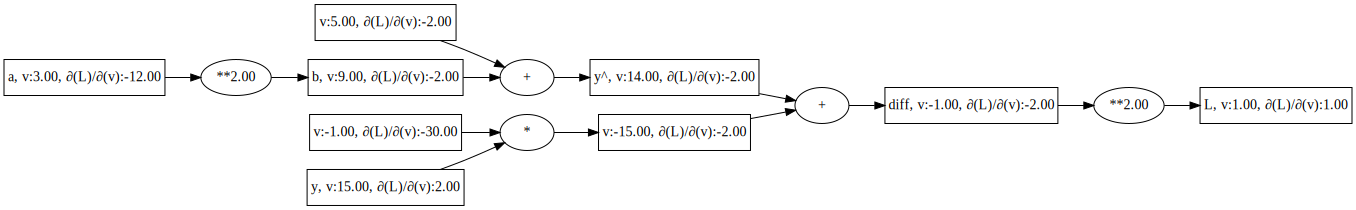

In [14]:
L.backward()
draw_dot(L)

In [15]:
# SANITY:
# for vi in list(v):
#     print(vi, vi.label, vi._children) 
# for ei in e:
#     print(ei)

In [16]:
random.seed(42)
nn_example = MLP(3,[1,1],'relu')
X_train_example = [
    [1.0, 2.0, 3.0],
]
y_train_example = [5.0,]
y_pred_example = nn_example(X_train_example[0])[0]
loss_example = (y_pred_example - y_train_example[0])**2

v:0.00, ∂(L)/∂(v):0.00
v:0.00, ∂(L)/∂(v):0.00
v:-0.55, ∂(L)/∂(v):0.00
v:-5.00, ∂(L)/∂(v):0.00
v:-1.00, ∂(L)/∂(v):0.00
v:0.35, ∂(L)/∂(v):0.00
v:-2.97, ∂(L)/∂(v):0.00
v:-0.95, ∂(L)/∂(v):0.00
v:-3.52, ∂(L)/∂(v):0.00
v:-4.65, ∂(L)/∂(v):0.00
v:-0.45, ∂(L)/∂(v):0.00
v:-1.35, ∂(L)/∂(v):0.00
v:3.00, ∂(L)/∂(v):0.00
v:0.28, ∂(L)/∂(v):0.00
v:0.28, ∂(L)/∂(v):0.00
v:5.00, ∂(L)/∂(v):0.00
v:-1.90, ∂(L)/∂(v):0.00
v:2.00, ∂(L)/∂(v):0.00
v:0.35, ∂(L)/∂(v):0.00
v:-1.62, ∂(L)/∂(v):0.00
v:0.47, ∂(L)/∂(v):0.00
v:21.59, ∂(L)/∂(v):0.00
v:1.00, ∂(L)/∂(v):0.00


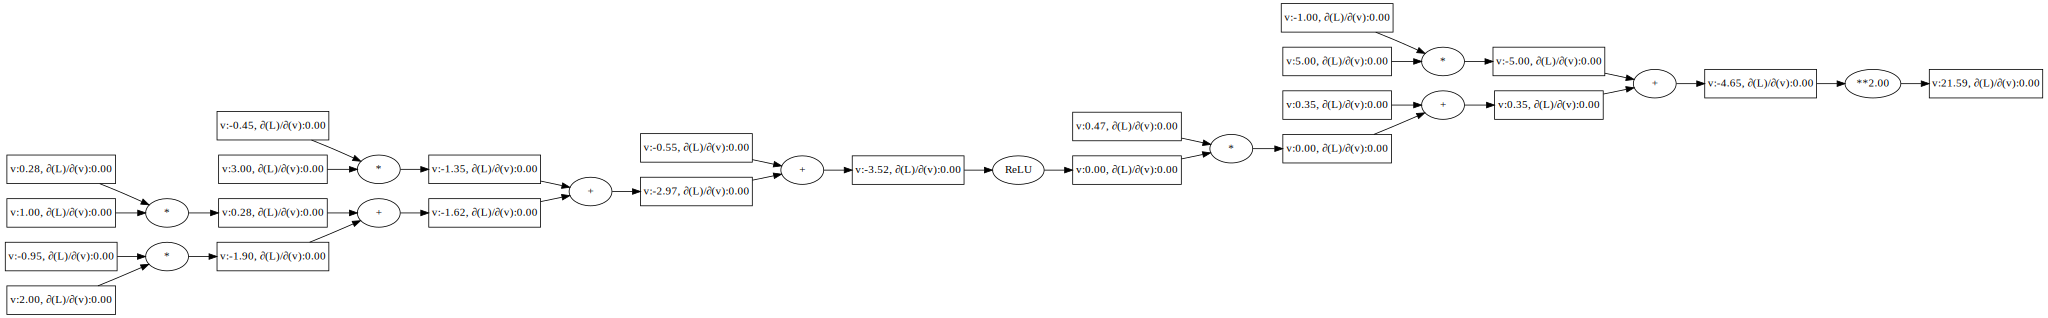

In [17]:
draw_dot(loss_example)

In [18]:
loss_example.backward()

v:0.00, ∂(L)/∂(v):-4.40
v:0.00, ∂(L)/∂(v):-9.29
v:-0.55, ∂(L)/∂(v):0.00
v:-5.00, ∂(L)/∂(v):-9.29
v:-1.00, ∂(L)/∂(v):-46.47
v:0.35, ∂(L)/∂(v):-9.29
v:-2.97, ∂(L)/∂(v):0.00
v:-0.95, ∂(L)/∂(v):0.00
v:-3.52, ∂(L)/∂(v):0.00
v:-4.65, ∂(L)/∂(v):-9.29
v:-0.45, ∂(L)/∂(v):0.00
v:-1.35, ∂(L)/∂(v):0.00
v:3.00, ∂(L)/∂(v):0.00
v:0.28, ∂(L)/∂(v):0.00
v:0.28, ∂(L)/∂(v):0.00
v:5.00, ∂(L)/∂(v):9.29
v:-1.90, ∂(L)/∂(v):0.00
v:2.00, ∂(L)/∂(v):0.00
v:0.35, ∂(L)/∂(v):-9.29
v:-1.62, ∂(L)/∂(v):0.00
v:0.47, ∂(L)/∂(v):0.00
v:21.59, ∂(L)/∂(v):1.00
v:1.00, ∂(L)/∂(v):0.00


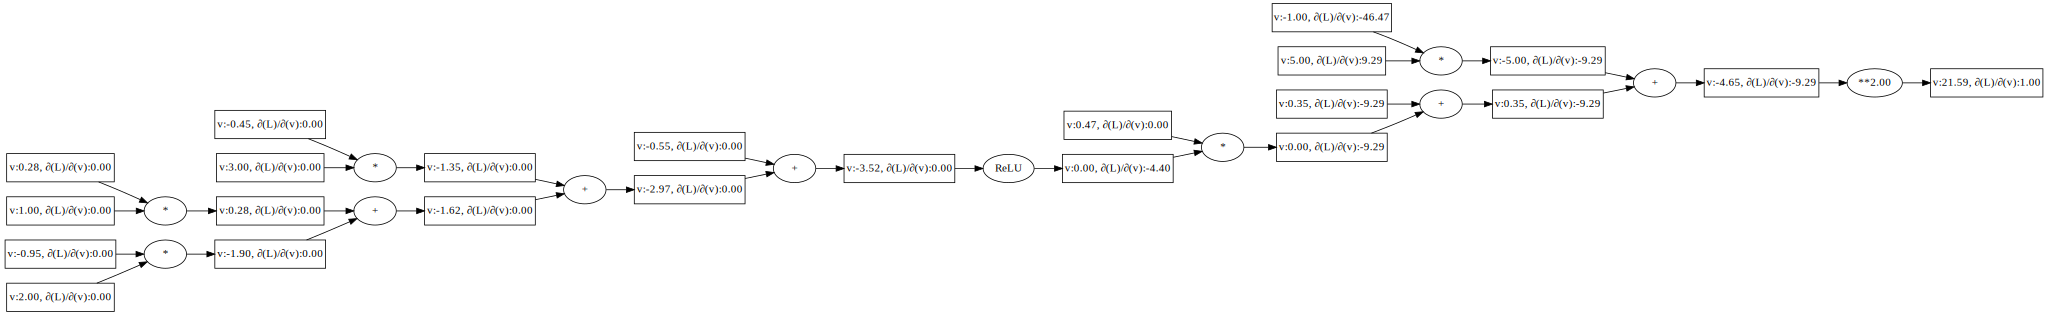

In [19]:
draw_dot(loss_example)

In [ ]:
random.seed(42)
nn = MLP(3,[2,1],'relu')


X_train = [
    [1.0, 2.0, 3.0],
    [0.0, 1.0, 0.0],
    [0.5, 1.0, 3.0],
        
]
y_train = [1.0, 2.0, 3.0] 

n_epoch = 100
lr = 0.01
for ep in range(n_epoch):
    # loss_data = Value(0.0)
    loss = 0.0
    for xi,yi in zip(X_train,y_train):
        yi_pred = nn(xi)[0]
        loss_i = (yi_pred - yi)**2
        loss = loss_i + loss
    print("loss=", loss.data)
    
    # loss = Value(loss_data, children=(y_pred,))
    for p in nn.parameters():
        p.grad = 0 
    loss.backward() # get d(L)/d(p) for each parameter p in the network 
    for p in nn.parameters():
        p.data -= lr * p.grad # Update network params: p -= lr * d(L)/d(p)


loss= 54.284400195928626
loss= 33.636865827756466
loss= 22.099990959264723
loss= 15.634025245393055
loss= 11.989714564002988
loss= 9.914972539202484
loss= 8.712998523408228
loss= 7.996164067843269
loss= 7.548946471464233
loss= 7.251601387047451
